In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pingouin as pg
from statsmodels.stats import outliers_influence 

In [2]:
DATADIR = './data/'

In [3]:
pstdf = pd.read_csv(DATADIR + 'pst_full_data.txt', sep='\t')
print(pstdf.head())

     Code subject         sleep  sr  BaselineFirst  female  age  night  \
0  S1-1-B      S1  Normal sleep   0              1       0   28    1.5   
1  S1-1-B      S1  Normal sleep   0              1       0   28    1.5   
2  S1-1-B      S1  Normal sleep   0              1       0   28    1.5   
3  S1-1-B      S1  Normal sleep   0              1       0   28    1.5   
4  S1-1-B      S1  Normal sleep   0              1       0   28    1.5   

   days_between_tests testtime  ... Actual wake time  Actual wake (%)  \
0                   7    13:51  ...              NaN              NaN   
1                   7    13:51  ...              NaN              NaN   
2                   7    13:51  ...              NaN              NaN   
3                   7    13:51  ...              NaN              NaN   
4                   7    13:51  ...              NaN              NaN   

  Sleep efficiency  Sleep latency get_up_easy well_rested KSS  SUSS kss_rt_ms  \
0              NaN            NaN  

In [4]:
print(pstdf['trialcode'].head())
print(pstdf['values.winletter'].head())
print(pstdf['values.selectedletter'].head())
print(pstdf['correct'].head())
print(pstdf['expressions.percA_ab'].head())
print(pstdf['days_between_tests'].head())
print(pstdf['trialnum'].head())
print(pstdf['kss_rt_ms'].head())

0    EF_phase1
1    CD_phase1
2    AB_phase1
3    AB_phase1
4    BA_phase1
Name: trialcode, dtype: object
0    E
1    C
2    A
3    A
4    A
Name: values.winletter, dtype: object
0    F
1    D
2    B
3    A
4    A
Name: values.selectedletter, dtype: object
0    0
1    0
2    0
3    1
4    1
Name: correct, dtype: int64
0         NaN
1         NaN
2    0.000000
3    0.500000
4    0.666667
Name: expressions.percA_ab, dtype: float64
0    7
1    7
2    7
3    7
4    7
Name: days_between_tests, dtype: int64
0     2
1     5
2     8
3    11
4    14
Name: trialnum, dtype: int64
0    167881
1    167881
2    167881
3    167881
4    167881
Name: kss_rt_ms, dtype: int64


In [16]:
print(pstdf['blockcode'].head())
print(pstdf['blockcode'].describe())
print(pstdf['blockcode'].unique())
print(pstdf['blockcode'].value_counts())

0    learningphase
1    learningphase
2    learningphase
3    learningphase
4    learningphase
Name: blockcode, dtype: object
count             13140
unique                7
top       learningphase
freq               3840
Name: blockcode, dtype: object
['learningphase' 'testphase' 'learningphase2' 'learningphase3'
 'learningphase4' 'learningphase5' 'learningphase6']
learningphase     3840
testphase         3840
learningphase2    2100
learningphase3    1260
learningphase4     960
learningphase5     600
learningphase6     540
Name: blockcode, dtype: int64


In [5]:
impdf = pstdf[['Code', 'subject', 'sleep', 'sr', 'BaselineFirst', 'female', 'age', 'correct', 'response_time_ms', 'Assumed sleep', 'Actual sleep time', 'Actual sleep (%)', 'Actual wake time', 'Actual wake (%)', 'Sleep efficiency', 'Sleep latency', 'get_up_easy', 'well_rested', 'KSS', 'SUSS', 'kss_rt_ms', 'stress_rt_ms']]

impdf.head()

,Code,subject,sleep,sr,BaselineFirst,female,age,correct,response_time_ms,Assumed sleep,...,Actual wake time,Actual wake (%),Sleep efficiency,Sleep latency,get_up_easy,well_rested,KSS,SUSS,kss_rt_ms,stress_rt_ms
0,S1-1-B,S1,Normal sleep,0,1,0,28,0,1205,07:40,...,NaN,NaN,NaN,NaN,3.5,3.5,4,1,167881,7614
1,S1-1-B,S1,Normal sleep,0,1,0,28,0,2007,07:40,...,NaN,NaN,NaN,NaN,3.5,3.5,4,1,167881,7614
2,S1-1-B,S1,Normal sleep,0,1,0,28,0,1808,07:40,...,NaN,NaN,NaN,NaN,3.5,3.5,4,1,167881,7614
3,S1-1-B,S1,Normal sleep,0,1,0,28,1,1234,07:40,...,NaN,NaN,NaN,NaN,3.5,3.5,4,1,167881,7614
4,S1-1-B,S1,Normal sleep,0,1,0,28,1,755,07:40,...,NaN,NaN,NaN,NaN,3.5,3.5,4,1,167881,7614


In [6]:
impdf.dropna(inplace=True)
impdf.shape

C:\Users\Akashdeep\AppData\Local\Temp\ipykernel_3284\2039094132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impdf.dropna(inplace=True)


(12600, 22)

NormaltestResult(statistic=34164.19445403006, pvalue=0.0)


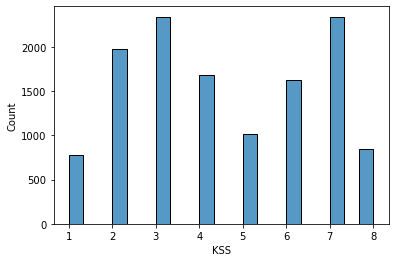

In [9]:
# hypothesis - gender and kss are related
sb.histplot(data=impdf, x='KSS')
print(stats.normaltest(impdf['KSS'].to_numpy()))

In [9]:
femkss = impdf.loc[impdf['female']==1]['KSS'].to_numpy()
malkss = impdf.loc[impdf['female']==0]['KSS'].to_numpy()


Text(0.5, 1.0, 'Bootstrapped mean differences of KSS for men and women')

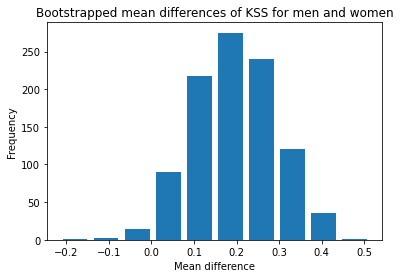

In [10]:
meandiff = np.zeros(1000)
for i in range(1000):
    var1 = np.random.choice(femkss, 1000)
    var2 = np.random.choice(malkss, 1000)
    meandiff[i] = np.mean(var1) - np.mean(var2)

plt.hist(meandiff, rwidth=0.8)
plt.xlabel('Mean difference')
plt.ylabel('Frequency')
plt.title('Bootstrapped mean differences of KSS for men and women')

In [11]:
stats.wilcoxon(meandiff)

WilcoxonResult(statistic=1526.5, pvalue=3.205584974257347e-163)

In [14]:
pg.wilcoxon(meandiff)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,684.5,two-sided,2.590542e-164,0.997265,NaN


In [13]:
stats.wilcoxon(meandiff, alternative='greater')

WilcoxonResult(statistic=499815.5, pvalue=1.2933334370077628e-164)

- From p-value we clearly have association of gender and KSS.
- Women are generally scoring higher in KSS than men.

NormaltestResult(statistic=1661.2999531859757, pvalue=0.0)


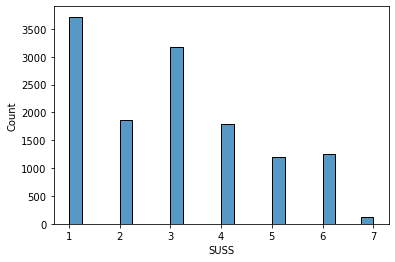

In [7]:
# hypothesis - age has relation with SUSS

sb.histplot(data=impdf, x='SUSS')
print(stats.normaltest(impdf['SUSS'].to_numpy()))

In [7]:
stats.kendalltau(
    impdf['age'].to_numpy(),
    impdf['SUSS'].to_numpy()
)

KendalltauResult(correlation=0.0731796439474185, pvalue=1.787487989279282e-27)

In [8]:
pg.corr(impdf['age'].to_numpy(), impdf['SUSS'].to_numpy(), method='kendall')

,n,r,CI95%,p-val,power
kendall,12600,0.07318,"[0.06, 0.09]",1.787488e-27,1.0


In [9]:
x_train, x_test, y_train, y_test = train_test_split(impdf['age'].to_numpy(), impdf['SUSS'].to_numpy(), test_size = 1/3)
model = LinearRegression()
model.fit(np.reshape(x_train, (x_train.shape[0], 1)), y_train)

LinearRegression()

In [11]:
model.coef_

array([0.0156404])

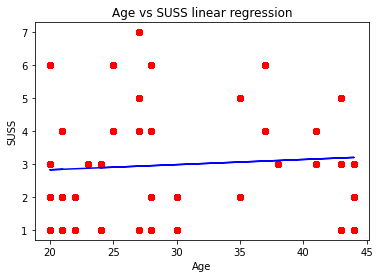

In [10]:
plt.scatter(impdf['age'].to_numpy(), impdf['SUSS'].to_numpy(), color='red')
plt.plot(impdf['age'].to_numpy(), model.predict(np.reshape(impdf['age'].to_numpy(), ((impdf['age'].shape[0], 1)))), color='blue')
plt.xlabel('Age')
plt.ylabel('SUSS')
plt.title('Age vs SUSS linear regression')
plt.show()

- From the p-value there is a clear association between age and stress.

In [7]:
impdf['correct'].value_counts()

1    8185
0    4955
Name: correct, dtype: int64

In [9]:
# hypothesis - KSS, SUSS, well rested and get up easy are associated with correctness

x, y = impdf[['KSS', 'SUSS', 'well_rested', 'get_up_easy']].to_numpy(), impdf['correct'].to_numpy()
# interaction effects
x = np.hstack((x, 
np.reshape(x[:, 0]*x[:, 1], (x.shape[0], 1)), 
np.reshape(x[:, 0]*x[:, 2], (x.shape[0], 1)), 
np.reshape(x[:, 0]*x[:, 3], (x.shape[0], 1)), 
np.reshape(x[:, 1]*x[:, 2], (x.shape[0], 1)), 
np.reshape(x[:, 1]*x[:, 3], (x.shape[0], 1)), 
np.reshape(x[:, 2]*x[:, 3], (x.shape[0], 1))))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

D:\software\miniconda3\envs\brsmenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
print(f"Score: {logreg.score(x_test, y_test)}")
print(f"{metrics.confusion_matrix(y_test, logreg.predict(x_test))}")

Score: 0.6338095238095238
[[   0 1538]
 [   0 2662]]


Text(0.5, 1.0, 'KSS SUSS logistic regression for correctness')

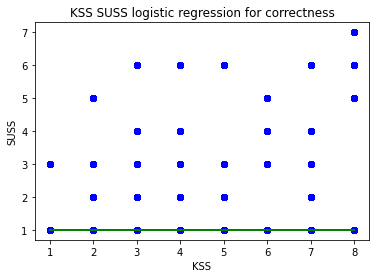

In [25]:
plt.scatter(impdf.loc[impdf['correct']==1]['KSS'].to_numpy(), impdf.loc[impdf['correct']==1]['SUSS'].to_numpy(), color='red')
plt.scatter(impdf.loc[impdf['correct']==0]['KSS'].to_numpy(), impdf.loc[impdf['correct']==0]['SUSS'].to_numpy(), color='blue')
plt.plot(
    impdf[['KSS']].to_numpy(), 
    logreg.predict(impdf[['KSS', 'SUSS', 'well_rested', 'get_up_easy']].to_numpy()), 
    color='green'
)
plt.xlabel('KSS')
plt.ylabel('SUSS')
plt.title('KSS SUSS logistic regression for correctness')

- Logistic regression cannot separate correct and incorrect answers

In [ ]:
# hypothesis - response times for kss and suss can determine 

<AxesSubplot:>

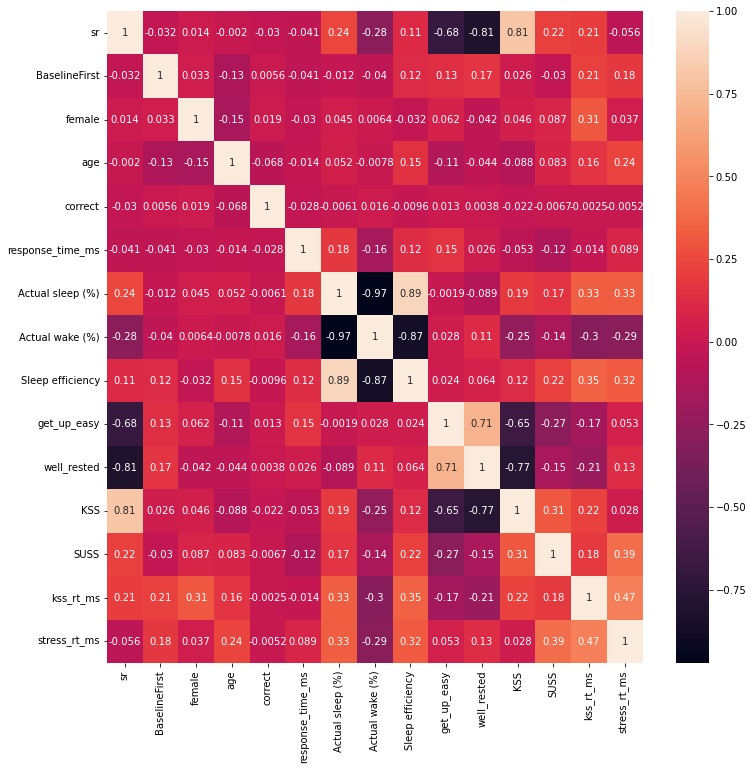

In [12]:
fig,ax = plt.subplots(figsize=(12,12))
sb.heatmap(impdf.corr(), annot=True, ax=ax)

In [17]:
numdf = impdf.select_dtypes(include=['int64', 'float64'])
print(numdf.dtypes)
print(impdf.dtypes)

sr                    int64
BaselineFirst         int64
female                int64
age                   int64
correct               int64
response_time_ms      int64
Actual sleep (%)    float64
Actual wake (%)     float64
Sleep efficiency    float64
get_up_easy         float64
well_rested         float64
KSS                   int64
SUSS                  int64
kss_rt_ms             int64
stress_rt_ms          int64
dtype: object
Code                  object
subject               object
sleep                 object
sr                     int64
BaselineFirst          int64
female                 int64
age                    int64
correct                int64
response_time_ms       int64
Assumed sleep         object
Actual sleep time     object
Actual sleep (%)     float64
Actual wake time      object
Actual wake (%)      float64
Sleep efficiency     float64
Sleep latency         object
get_up_easy          float64
well_rested          float64
KSS                    int64
SUSS           

In [18]:
vif_data = pd.DataFrame()
vif_data["feature"] = numdf.columns

vif_data["VIF"] = [outliers_influence.variance_inflation_factor(numdf.values, i)
                          for i in range(len(numdf.columns))]
print(vif_data)

             feature          VIF
0                 sr     9.960257
1      BaselineFirst     2.493638
2             female     2.760898
3                age    19.768573
4            correct     2.691166
5   response_time_ms     4.668938
6   Actual sleep (%)  1359.042170
7    Actual wake (%)     4.079110
8   Sleep efficiency  1423.489533
9        get_up_easy    20.590402
10       well_rested    26.104864
11               KSS    21.785799
12              SUSS     6.653981
13         kss_rt_ms     6.226983
14      stress_rt_ms    18.990567
